<a href="https://colab.research.google.com/github/bidishaaiml/COE_week4_assignment/blob/main/Week4_assignment_datapreprocessing_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Data Preprocessing and Feature Engineering on the Diabetes dataset on which visulization was done on the previous week assignment**

In [1689]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1690]:
!pip install missingno

In [1691]:
#Loading the dataset
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')

#To view all the columns at once
pd.set_option('display.max_columns', 22)
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [1692]:
df.shape
#The dataset has 253680 rows and 22 columns

(253680, 22)

In [1693]:
df.info()
#information of the types of data present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [1694]:
df.describe()
#some statitical insights of the dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [1695]:
df.isnull().sum()
#checking if there are any null values or misiing values in the dataset

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [1696]:
#df.fillna(df.mean(), inplace=True)

No there are no missing values in the dataset

In [1697]:
#counting the number of diabetic and non diabetic patients in the dataset
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [1698]:
#Calculate correlations with the target column
correlations = df.corr()['Diabetes_012'].sort_values(ascending=False)
correlations

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

This variables are more correlated with the target variable Diabetes_012

GenHlth,
HighBP,
DiffWalk,
BMI,
HighChol,
Age,
HeartDiseaseorAttack,
PhysHlth,
Physactivity,
Education,
Income

This variables that have a very weak correlation

AnyHealthcare,
NoDocbcCost,
Fruits,
Sex,
Smoker,
Veggies,

In [1699]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Count number of duplicate rows
num_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")


Number of duplicate rows: 23899


There are duplicate values which needs to be removed

# **FEATURE ENGINEERING & DATA PRE-PROCESSING**

In [1700]:
#############################################
# FEATURE ENGINEERING & DATA PRE-PROCESSING
#############################################

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [1701]:
df= df.astype(int)
#converting all the float datatypes to int datatypes

In [1702]:
# Renaming the columns to make it understandable
df.rename(columns={
    'Diabetes_012': 'Diabetes_Status',
    'HighBP': 'High_Blood_Pressure',
    'HighChol': 'High_Cholesterol',
    'CholCheck': 'Cholesterol_Check',
    'BMI': 'Body_Mass_Index',
    'Smoker': 'Smoker',
    'Stroke': 'Stroke',
    'HeartDiseaseorAttack': 'Heart_Disease_or_Attack',
    'PhysActivity': 'Physical_Activity',
    'Fruits': 'Fruits_Consumption',
    'Veggies': 'Vegetables_Consumption',
    'HvyAlcoholConsump': 'Heavy_Alcohol_Consumption',
    'AnyHealthcare': 'Any_Healthcare',
    'NoDocbcCost': 'No_Doctor_due_to_Cost',
    'GenHlth': 'General_Health',
    'MentHlth': 'Mental_Health',
    'PhysHlth': 'Physical_Health',
    'DiffWalk': 'Difficulty_Walking',
    'Sex': 'Sex',
    'Age': 'Age',
    'Education': 'Education',
    'Income': 'Income'
}, inplace=True)

df.head()

,Diabetes_Status,High_Blood_Pressure,High_Cholesterol,Cholesterol_Check,Body_Mass_Index,Smoker,Stroke,Heart_Disease_or_Attack,Physical_Activity,Fruits_Consumption,Vegetables_Consumption,Heavy_Alcohol_Consumption,Any_Healthcare,No_Doctor_due_to_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [1703]:

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Print information about the cleaned DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing duplicates: {df_cleaned.shape}")


Original DataFrame shape: (253680, 22)
DataFrame shape after removing duplicates: (229781, 22)


## **OUTLIER HANDLING**

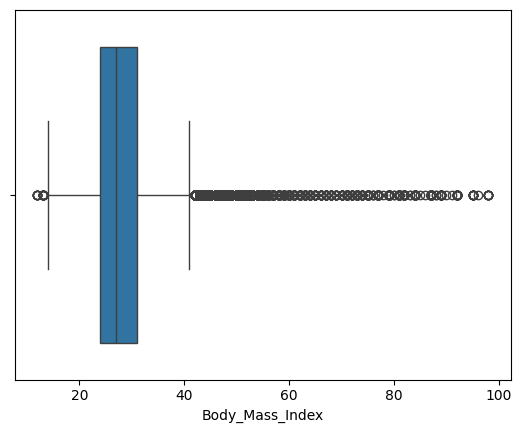

In [1704]:
#plotting the boxplot to check for outliers in the column
sns.boxplot(x=df["Body_Mass_Index"])
plt.show()

The column BMI has outliers which has to be removed

In [1705]:
df["Body_Mass_Index"].unique()
# printing the unique values in the BMI column

array([40, 25, 28, 27, 24, 30, 34, 26, 33, 21, 23, 22, 38, 32, 37, 31, 29,
       20, 35, 45, 39, 19, 47, 18, 36, 43, 55, 49, 42, 17, 16, 41, 44, 50,
       59, 48, 52, 46, 54, 57, 53, 14, 15, 51, 58, 63, 61, 56, 74, 62, 64,
       66, 73, 85, 60, 67, 65, 70, 82, 79, 92, 68, 72, 88, 96, 13, 81, 71,
       75, 12, 77, 69, 76, 87, 89, 84, 95, 98, 91, 86, 83, 80, 90, 78])

In [1706]:
#Calculate upper and lower outlier limits for a numerical column based on quartiles.
#The lower quartile value (default is 0.25).
#The upper quartile value (default is 0.75).
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit




In [1707]:
low_limit, up_limit = outlier_thresholds(df, "Body_Mass_Index")
print(f"Lower limit: {low_limit}, Upper limit: {up_limit}")
#printing the lower limits and the upper limits
#below the lower limit and above the upper limit all are outliers wich has to be removed

Lower limit: 13.5, Upper limit: 41.5


In [1708]:
#below the lower limit and above the upper limit all are outliers wich has to be removed
outliers = df[(df["Body_Mass_Index"] < low_limit) | (df["Body_Mass_Index"] > up_limit)]
outliers.head()

,Diabetes_Status,High_Blood_Pressure,High_Cholesterol,Cholesterol_Check,Body_Mass_Index,Smoker,Stroke,Heart_Disease_or_Attack,Physical_Activity,Fruits_Consumption,Vegetables_Consumption,Heavy_Alcohol_Consumption,Any_Healthcare,No_Doctor_due_to_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
85,2,1,1,1,45,0,0,0,0,0,1,0,1,0,4,2,30,1,0,9,6,8
97,0,1,0,1,45,0,0,0,1,1,1,0,1,0,3,0,0,0,0,9,4,6
156,2,1,1,1,47,1,0,0,0,1,0,0,1,0,3,0,0,1,0,11,6,5
188,0,1,0,1,43,1,0,0,0,0,1,0,1,0,4,0,7,1,0,10,5,2
201,2,1,1,1,55,0,0,0,0,1,1,0,1,0,4,0,15,0,0,11,5,2


In [1709]:
outliers["Body_Mass_Index"].unique()

array([45, 47, 43, 55, 49, 42, 44, 50, 59, 48, 52, 46, 54, 57, 53, 51, 58,
       63, 61, 56, 74, 62, 64, 66, 73, 85, 60, 67, 65, 70, 82, 79, 92, 68,
       72, 88, 96, 13, 81, 71, 75, 12, 77, 69, 76, 87, 89, 84, 95, 98, 91,
       86, 83, 80, 90, 78])

In [1710]:
# Remove these outliers from the DataFrame
df_filtered = df[~((df["Body_Mass_Index"] < low_limit) | (df["Body_Mass_Index"] > up_limit))]
print(df_filtered["Body_Mass_Index"].unique())

[40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 39 19 18 36 17
 16 41 14 15]


In [1711]:
df=df_filtered

In [1712]:
print(df["Body_Mass_Index"].unique())

[40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 39 19 18 36 17
 16 41 14 15]


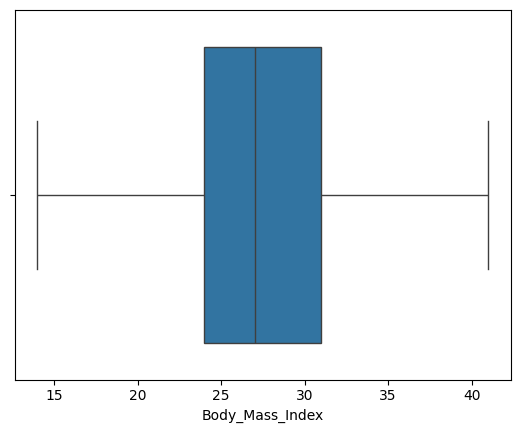

In [1713]:
#now visualizing the boxplot to see if outliers are removed or not
sns.boxplot(x=df["Body_Mass_Index"])
plt.show()

In [1714]:
#defining a funtion to check if a column has outliers or not
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True #return True if the column has outliers
    else:
        return False #return False if the column has outliers

print(check_outlier(df, "Body_Mass_Index"))


False


In [1715]:
#generating new columns from the exixiting columns
df['Health_Indicators_Sum'] = df[['General_Health', 'Mental_Health', 'Physical_Health']].sum(axis=1)

In [1716]:
df['PhysActivity_Fruits_Interaction'] = df['Physical_Activity'] * df['Fruits_Consumption']

In [1717]:
df['Healthcare_Access'] = df['Any_Healthcare'] + df['No_Doctor_due_to_Cost']

In [1718]:
#dropping thes columns as that are not stronly corelated with diabetes status
df.drop(columns=['Education','Heavy_Alcohol_Consumption','Fruits_Consumption','Vegetables_Consumption','Smoker'], inplace=True)

In [1719]:
df['Mental_Health'].unique()

array([18,  0, 30,  3,  5, 15, 10,  6, 20,  2, 25,  1,  4,  7,  8, 21, 14,
       26, 29, 28, 11, 12, 24, 17, 13, 27, 16, 19, 22,  9, 23])

In [1720]:
#Tring to grab categorical columns, categorical but numerical columns.

def grab_col_names(dataframe, cat_th=15):

    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes != "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols]
    num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols

cat_cols, num_cols = grab_col_names(df)


Observations: 243833
Variables: 20
cat_cols: 16
num_cols: 4
num_but_cat: 16


In [1721]:
#check outliers in numerical columns.
for col in num_cols:
    print(col, check_outlier(df, col))


Body_Mass_Index False
Mental_Health True
Physical_Health True
Health_Indicators_Sum True


In [1722]:
df['Age'].unique()

array([ 9,  7, 11, 10,  8, 13,  4,  6,  2, 12,  5,  1,  3])

In [1723]:
num_cols

['Body_Mass_Index',
 'Mental_Health',
 'Physical_Health',
 'Health_Indicators_Sum']

In [1724]:
cat_cols

['Diabetes_Status',
 'High_Blood_Pressure',
 'High_Cholesterol',
 'Cholesterol_Check',
 'Stroke',
 'Heart_Disease_or_Attack',
 'Physical_Activity',
 'Any_Healthcare',
 'No_Doctor_due_to_Cost',
 'General_Health',
 'Difficulty_Walking',
 'Sex',
 'Age',
 'Income',
 'PhysActivity_Fruits_Interaction',
 'Healthcare_Access']

### **Check the other columns if they have outliers and replace them with the threshold values without removing them**

In [1725]:
#assign outliers with thresholds. The function for this is
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [1726]:
#replacing the numerical columns having outliers with the threshold values
for col in num_cols:
    replace_with_thresholds(df, col)

In [1727]:
for col in num_cols:
  print(col,check_outlier(df, col))

Body_Mass_Index False
Mental_Health False
Physical_Health False
Health_Indicators_Sum False


In [1728]:
#checking the categorical columns if they have outliers
for col in cat_cols:
  print(col,check_outlier(df, col))

Diabetes_Status True
High_Blood_Pressure False
High_Cholesterol False
Cholesterol_Check True
Stroke True
Heart_Disease_or_Attack True
Physical_Activity True
Any_Healthcare True
No_Doctor_due_to_Cost True
General_Health True
Difficulty_Walking True
Sex False
Age False
Income False
PhysActivity_Fruits_Interaction False
Healthcare_Access True


In [1729]:
#replacing the categorical columns having outliers with the threshold values
for col in cat_cols:
    replace_with_thresholds(df, col)

In [1730]:
for col in cat_cols:
  print(col,check_outlier(df, col))

Diabetes_Status False
High_Blood_Pressure False
High_Cholesterol False
Cholesterol_Check False
Stroke False
Heart_Disease_or_Attack False
Physical_Activity False
Any_Healthcare False
No_Doctor_due_to_Cost False
General_Health False
Difficulty_Walking False
Sex False
Age False
Income False
PhysActivity_Fruits_Interaction False
Healthcare_Access False


## **Handling Categorical column using One Hot Encoding**

In [1731]:
# One-hot encode 'Sex' column
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [1732]:
# Concatenate df and df_encoded
df = pd.concat([df, df_encoded], axis=1)


In [1733]:
pd.set_option('display.max_columns', 42)
df.head()

,Diabetes_Status,High_Blood_Pressure,High_Cholesterol,Cholesterol_Check,Body_Mass_Index,Stroke,Heart_Disease_or_Attack,Physical_Activity,Any_Healthcare,No_Doctor_due_to_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Income,Health_Indicators_Sum,PhysActivity_Fruits_Interaction,Healthcare_Access,Diabetes_Status,High_Blood_Pressure,High_Cholesterol,Cholesterol_Check,Body_Mass_Index,Stroke,Heart_Disease_or_Attack,Physical_Activity,Any_Healthcare,No_Doctor_due_to_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Age,Income,Health_Indicators_Sum,PhysActivity_Fruits_Interaction,Healthcare_Access,Sex_1.0
0,0,1.0,1.0,1,40.0,0,0,1,1,0,4.5,5,7.5,0,0.0,9,3.0,22,0.0,1,0,1.0,1.0,1,40.0,0,0,1,1,0,4.5,5,7.5,0,9,3.0,22,0.0,1,False
1,0,0.0,0.0,1,25.0,0,0,1,1,0,3.0,0,0.0,0,0.0,7,1.0,3,0.0,1,0,0.0,0.0,1,25.0,0,0,1,1,0,3.0,0,0.0,0,7,1.0,3,0.0,1,False
2,0,1.0,1.0,1,28.0,0,0,1,1,0,4.5,5,7.5,0,0.0,9,8.0,22,0.0,1,0,1.0,1.0,1,28.0,0,0,1,1,0,4.5,5,7.5,0,9,8.0,22,0.0,1,False
3,0,1.0,0.0,1,27.0,0,0,1,1,0,2.0,0,0.0,0,0.0,11,6.0,2,1.0,1,0,1.0,0.0,1,27.0,0,0,1,1,0,2.0,0,0.0,0,11,6.0,2,1.0,1,False
4,0,1.0,1.0,1,24.0,0,0,1,1,0,2.0,3,0.0,0,0.0,11,4.0,5,1.0,1,0,1.0,1.0,1,24.0,0,0,1,1,0,2.0,3,0.0,0,11,4.0,5,1.0,1,False


# **Scaling the features**

In [1734]:
#Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[cat_cols] = scaler.fit_transform(df[cat_cols])

In [1735]:

df.head()

,Diabetes_Status,High_Blood_Pressure,High_Cholesterol,Cholesterol_Check,Body_Mass_Index,Stroke,Heart_Disease_or_Attack,Physical_Activity,Any_Healthcare,No_Doctor_due_to_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Income,Health_Indicators_Sum,PhysActivity_Fruits_Interaction,Healthcare_Access,Diabetes_Status,High_Blood_Pressure,High_Cholesterol,Cholesterol_Check,Body_Mass_Index,Stroke,Heart_Disease_or_Attack,Physical_Activity,Any_Healthcare,No_Doctor_due_to_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Age,Income,Health_Indicators_Sum,PhysActivity_Fruits_Interaction,Healthcare_Access,Sex_1.0
0,0.0,1.174802,1.170265,0.0,2.503673,0.0,0.0,0.0,0.0,0.0,2.020903,1.992274,2.004364,0.0,-0.895436,0.305801,-1.504596,2.014509,-1.033497,0.0,0.0,1.174802,1.170265,0.0,2.503673,0.0,0.0,0.0,0.0,0.0,2.020903,1.992274,2.004364,0.0,0.305801,-1.504596,2.014509,-1.033497,0.0,False
1,0.0,-0.851208,-0.854508,0.0,-0.517531,0.0,0.0,0.0,0.0,0.0,0.535914,-0.592595,-0.628094,0.0,-0.895436,-0.346876,-2.478202,-0.564875,-1.033497,0.0,0.0,-0.851208,-0.854508,0.0,-0.517531,0.0,0.0,0.0,0.0,0.0,0.535914,-0.592595,-0.628094,0.0,-0.346876,-2.478202,-0.564875,-1.033497,0.0,False
2,0.0,1.174802,1.170265,0.0,0.086710,0.0,0.0,0.0,0.0,0.0,2.020903,1.992274,2.004364,0.0,-0.895436,0.305801,0.929421,2.014509,-1.033497,0.0,0.0,1.174802,1.170265,0.0,0.086710,0.0,0.0,0.0,0.0,0.0,2.020903,1.992274,2.004364,0.0,0.305801,0.929421,2.014509,-1.033497,0.0,False
3,0.0,1.174802,-0.854508,0.0,-0.114703,0.0,0.0,0.0,0.0,0.0,-0.454078,-0.592595,-0.628094,0.0,-0.895436,0.958478,-0.044186,-0.700632,0.967588,0.0,0.0,1.174802,-0.854508,0.0,-0.114703,0.0,0.0,0.0,0.0,0.0,-0.454078,-0.592595,-0.628094,0.0,0.958478,-0.044186,-0.700632,0.967588,0.0,False
4,0.0,1.174802,1.170265,0.0,-0.718944,0.0,0.0,0.0,0.0,0.0,-0.454078,0.958326,-0.628094,0.0,-0.895436,0.958478,-1.017792,-0.293361,0.967588,0.0,0.0,1.174802,1.170265,0.0,-0.718944,0.0,0.0,0.0,0.0,0.0,-0.454078,0.958326,-0.628094,0.0,0.958478,-1.017792,-0.293361,0.967588,0.0,False


In [1736]:
pd.set_option('display.max_columns', 41)
df.head()

,Diabetes_Status,High_Blood_Pressure,High_Cholesterol,Cholesterol_Check,Body_Mass_Index,Stroke,Heart_Disease_or_Attack,Physical_Activity,Any_Healthcare,No_Doctor_due_to_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Income,Health_Indicators_Sum,PhysActivity_Fruits_Interaction,Healthcare_Access,Diabetes_Status,High_Blood_Pressure,High_Cholesterol,Cholesterol_Check,Body_Mass_Index,Stroke,Heart_Disease_or_Attack,Physical_Activity,Any_Healthcare,No_Doctor_due_to_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Age,Income,Health_Indicators_Sum,PhysActivity_Fruits_Interaction,Healthcare_Access,Sex_1.0
0,0.0,1.174802,1.170265,0.0,2.503673,0.0,0.0,0.0,0.0,0.0,2.020903,1.992274,2.004364,0.0,-0.895436,0.305801,-1.504596,2.014509,-1.033497,0.0,0.0,1.174802,1.170265,0.0,2.503673,0.0,0.0,0.0,0.0,0.0,2.020903,1.992274,2.004364,0.0,0.305801,-1.504596,2.014509,-1.033497,0.0,False
1,0.0,-0.851208,-0.854508,0.0,-0.517531,0.0,0.0,0.0,0.0,0.0,0.535914,-0.592595,-0.628094,0.0,-0.895436,-0.346876,-2.478202,-0.564875,-1.033497,0.0,0.0,-0.851208,-0.854508,0.0,-0.517531,0.0,0.0,0.0,0.0,0.0,0.535914,-0.592595,-0.628094,0.0,-0.346876,-2.478202,-0.564875,-1.033497,0.0,False
2,0.0,1.174802,1.170265,0.0,0.086710,0.0,0.0,0.0,0.0,0.0,2.020903,1.992274,2.004364,0.0,-0.895436,0.305801,0.929421,2.014509,-1.033497,0.0,0.0,1.174802,1.170265,0.0,0.086710,0.0,0.0,0.0,0.0,0.0,2.020903,1.992274,2.004364,0.0,0.305801,0.929421,2.014509,-1.033497,0.0,False
3,0.0,1.174802,-0.854508,0.0,-0.114703,0.0,0.0,0.0,0.0,0.0,-0.454078,-0.592595,-0.628094,0.0,-0.895436,0.958478,-0.044186,-0.700632,0.967588,0.0,0.0,1.174802,-0.854508,0.0,-0.114703,0.0,0.0,0.0,0.0,0.0,-0.454078,-0.592595,-0.628094,0.0,0.958478,-0.044186,-0.700632,0.967588,0.0,False
4,0.0,1.174802,1.170265,0.0,-0.718944,0.0,0.0,0.0,0.0,0.0,-0.454078,0.958326,-0.628094,0.0,-0.895436,0.958478,-1.017792,-0.293361,0.967588,0.0,0.0,1.174802,1.170265,0.0,-0.718944,0.0,0.0,0.0,0.0,0.0,-0.454078,0.958326,-0.628094,0.0,0.958478,-1.017792,-0.293361,0.967588,0.0,False
